In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")


In [ ]:
data_path = '/content/cardekho_dataset.csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,Unnamed: 0,brand,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [ ]:
print('The size of Dataframe is: ', df.shape)
print('-'*100)
print('The Column Name, Record Count and Data Types are as follows: ')
df.info()
print('-'*100)

The size of Dataframe is:  (15411, 14)
----------------------------------------------------------------------------------------------------
The Column Name, Record Count and Data Types are as follows: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats       

In [ ]:
# 1. Drop unnecessary columns
df = df.drop(['Unnamed: 0'], axis=1)

this is an unnecessary index column


In [ ]:
# Defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 7 numerical features : ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']

We have 4 categorical features : ['brand', 'seller_type', 'fuel_type', 'transmission_type']


In [ ]:
print('Missing Value Presence in different columns of DataFrame are as follows : ')
print('-'*100)
total=df.isnull().sum().sort_values(ascending=False)
percent=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

Missing Value Presence in different columns of DataFrame are as follows : 
----------------------------------------------------------------------------------------------------


,Total,Percent
brand,0,0.0
vehicle_age,0,0.0
km_driven,0,0.0
seller_type,0,0.0
fuel_type,0,0.0
transmission_type,0,0.0
mileage,0,0.0
engine,0,0.0
max_power,0,0.0
seats,0,0.0


no missing values

In [ ]:
print('Summary Statistics of numerical features for DataFrame are as follows:')
print('-'*100)
df.describe()

Summary Statistics of numerical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [ ]:
print('Summary Statistics of categorical features for DataFrame are as follows:')
print('-'*100)
df.describe(include= 'object')

Summary Statistics of categorical features for DataFrame are as follows:
----------------------------------------------------------------------------------------------------


,brand,seller_type,fuel_type,transmission_type
count,15411,15411,15411,15411
unique,32,3,5,2
top,Maruti,Dealer,Petrol,Manual
freq,4992,9539,7643,12225


# Exploratory Data Analysis

# Univariate Analysis
Numerical Features

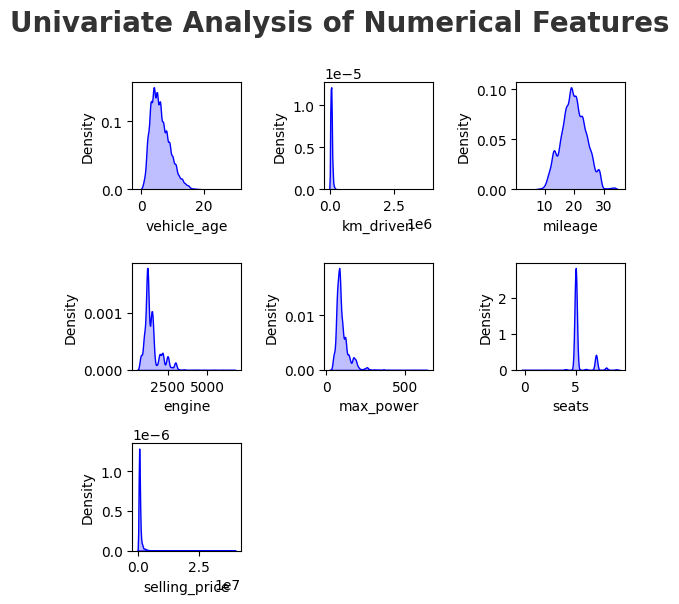

In [ ]:
plt.figure(figsize=(6, 6))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

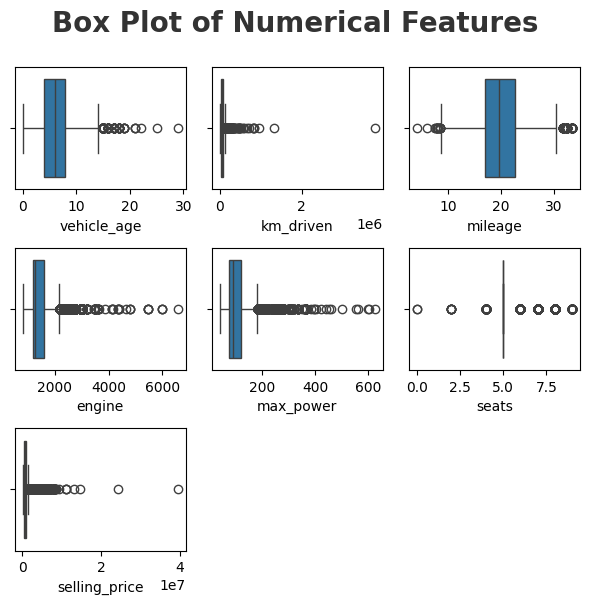

In [ ]:
plt.figure(figsize=(6, 6))
plt.suptitle('Box Plot of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

for i in range(0, len(numeric_features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]])
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Km_driven, max_power, selling_price, and engine are right skewed and postively skewed.
Outliers in km_driven, enginer, selling_price, and max power.

# Categorical Features


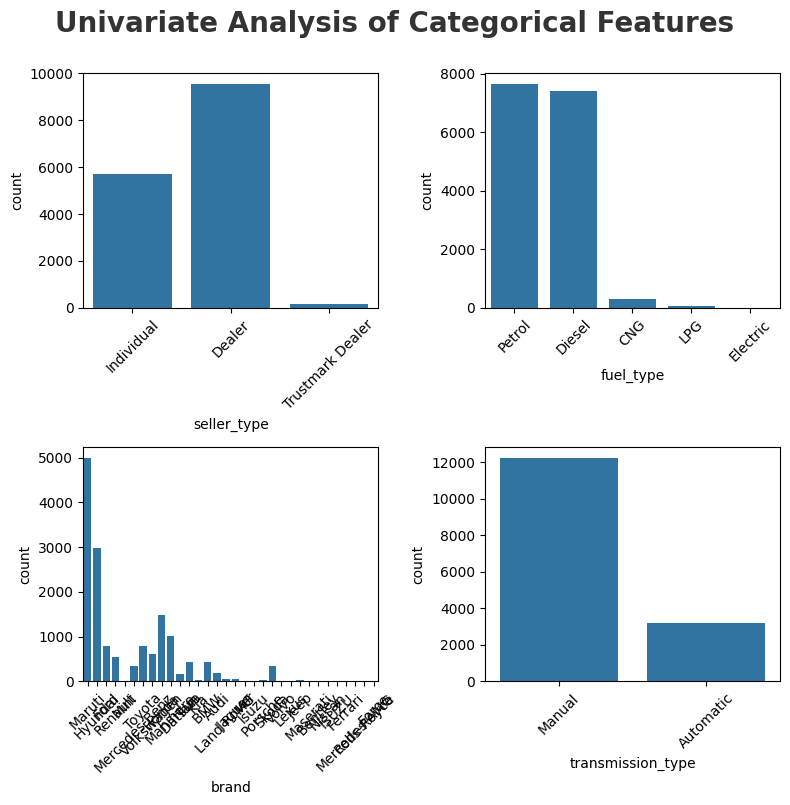

In [ ]:
plt.figure(figsize=(8, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

cat1 = [ 'seller_type', 'fuel_type','brand', 'transmission_type']
for i in range(0, len(cat1)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Bivariate Analysis

In [ ]:
continuous_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continuos features:',continuous_features)

Num of continuos features: ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']


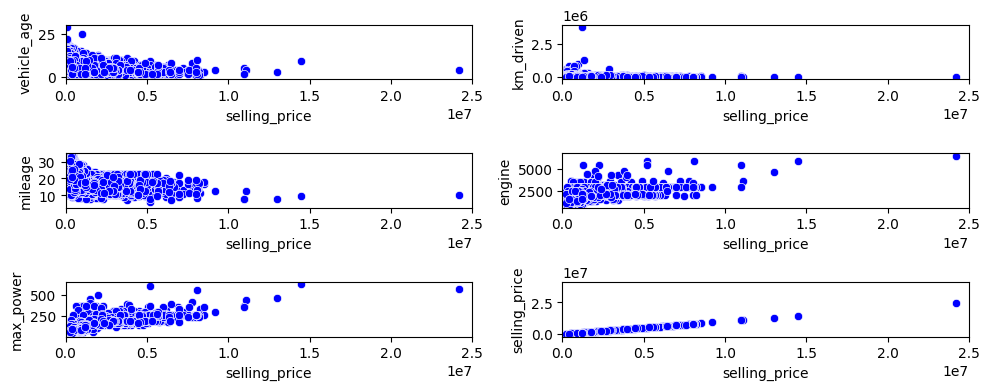

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i in range(0, len(continuous_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='selling_price', y=continuous_features[i], color='b')
    plt.xlim(0,25000000) # Limit to 25 lakhs Rupees to view clean
    plt.tight_layout()

Lower Vehicle age has more selling price than Vehicle with more age.
Engine CC has positive effect on price,Vehicle with 2000 cc and below are mostly priced below 5lakh.
Kms Driven has negative effect on selling price.

# Multivariate Analysis

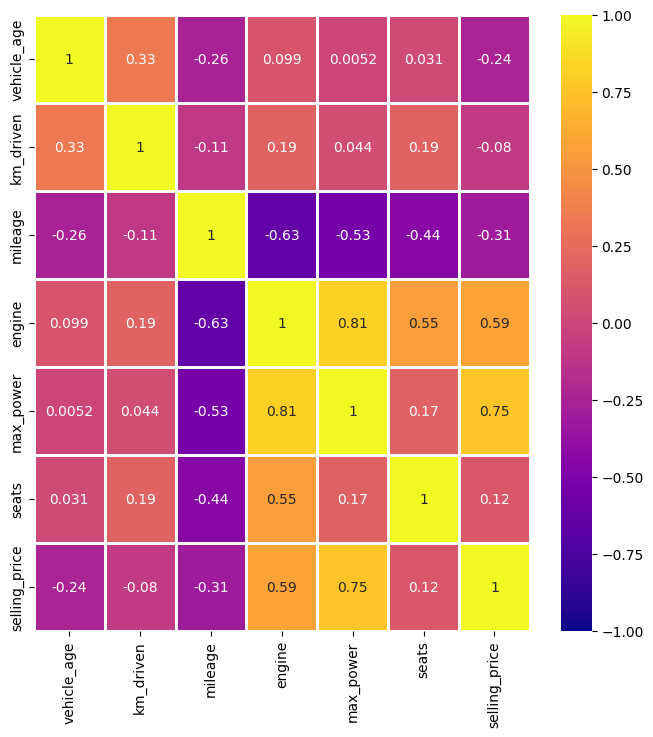

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data = df[numeric_features].corr(), annot= True, cmap= 'plasma', vmin= -1 , vmax= 1, linecolor='white', linewidths=2)
plt.show()

Max Power and Engine are highly correlated.

Max Power and Selling Price are highly correlated.

# Feature Engineering

# Feature Encoding and Scaling

In [ ]:
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'engine', 'max_power', 'selling_price']
print("\
Skewness in numerical columns:")
print(df[numerical_cols].skew())

Skewness in numerical columns:
vehicle_age       0.833712
km_driven        28.172711
mileage           0.104961
engine            1.666467
max_power         2.485129
selling_price    10.047048
dtype: float64


In [ ]:
categorical_cols = ['brand','seller_type', 'fuel_type', 'transmission_type']
for col in categorical_cols:
    print(f"{col}: {df[col].value_counts().shape[0]} unique values")
    print(f"Top 5 most frequent values:")
    print(df[col].value_counts().head())
    print("\
")

brand: 32 unique values
Top 5 most frequent values:
brand
Maruti      4992
Hyundai     2982
Honda       1485
Mahindra    1011
Toyota       793
Name: count, dtype: int64

seller_type: 3 unique values
Top 5 most frequent values:
seller_type
Dealer              9539
Individual          5699
Trustmark Dealer     173
Name: count, dtype: int64

fuel_type: 5 unique values
Top 5 most frequent values:
fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

transmission_type: 2 unique values
Top 5 most frequent values:
transmission_type
Manual       12225
Automatic     3186
Name: count, dtype: int64



In [ ]:
# More efficient encoding approach
from sklearn.preprocessing import LabelEncoder

# Use Label Encoding for binary and low-cardinality features
le = LabelEncoder()
df['transmission_type'] = le.fit_transform(df['transmission_type'])
df['seller_type'] = le.fit_transform(df['seller_type'])
df['fuel_type'] = le.fit_transform(df['fuel_type'])

In [ ]:
# Use One-hot encoding only for brand
df= pd.get_dummies(df, columns=['brand'])

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Apply log transformation to skewed numerical features
df['km_driven'] = np.log1p(df['km_driven'])
df['selling_price'] = np.log1p(df['selling_price'])
df['max_power'] = np.log1p(df['max_power'])
df['engine'] = np.log1p(df['engine'])

# Automatically detect numerical columns (excluding one-hot encoded categorical variables)
numerical_cols = df.select_dtypes(include=['number']).columns

# Apply scaling only to numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Feature scaling applied successfully!")
print("New shape of preprocessed dataset:", df.shape)
print("First 10 features:", list(df.columns[:10]))


Feature scaling applied successfully!
New shape of preprocessed dataset: (15411, 42)
First 10 features: ['vehicle_age', 'km_driven', 'seller_type', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power', 'seats', 'selling_price']


In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# Prepare the data
X = df.drop(['selling_price'], axis=1)  # Drop 'selling_price'
y = df['selling_price']

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,brand_Audi,...,brand_Mini,brand_Nissan,brand_Porsche,brand_Renault,brand_Rolls-Royce,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen,brand_Volvo
0,0.983562,1.315233,1.189966,1.001423,0.510503,-0.000276,-1.856452,-1.984775,-0.403022,False,...,False,False,False,False,False,False,False,False,False,False
1,-0.343933,-0.997863,1.189966,1.001423,0.510503,-0.192071,-0.535182,-0.382707,-0.403022,False,...,False,False,False,False,False,False,False,False,False,False
2,1.647309,0.420395,1.189966,1.001423,0.510503,-0.647583,-0.535182,-0.452198,-0.403022,False,...,False,False,False,False,False,False,False,False,False,False
3,0.983562,-0.203692,1.189966,1.001423,0.510503,0.292211,-1.124095,-0.946416,-0.403022,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.012060,-0.474432,-0.768028,-0.967649,0.510503,0.735736,0.191484,0.136438,-0.403022,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,0.983562,-1.802537,-0.768028,1.001423,0.510503,0.026096,-0.850403,-0.906947,-0.403022,False,...,False,False,False,False,False,False,False,False,False,False
15407,-1.339555,-1.133876,-0.768028,1.001423,0.510503,-0.527711,-0.090799,-0.086315,2.073444,False,...,False,False,False,False,False,False,False,False,False,False
15408,-0.012060,0.562852,-0.768028,-0.967649,0.510503,0.344954,0.191484,0.274091,-0.403022,False,...,False,False,False,False,False,True,False,False,False,False
15409,-0.343933,5.775948,-0.768028,-0.967649,0.510503,-0.887326,1.405680,1.127023,2.073444,False,...,False,False,False,False,False,False,False,False,False,False


# Models Implementation.


# 1- basic linear regression

In [ ]:
# 1. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))

print("Linear Regression Results:")
print("R2 Score:", lr_r2)
print("RMSE:", lr_rmse)
print("\
")

Linear Regression Results:
R2 Score: 0.9006432885046214
RMSE: 0.3244314356827618



# Triying Ridge Regressor.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Ridge Regression model
ridge = Ridge(alpha=1.0)  # Default alpha value
ridge.fit(X_train, y_train)

# Make predictions
y_pred = ridge.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.25
Mean Squared Error: 0.11
R-squared Score: 0.90


# Ridge and Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import numpy as np

# Define the hyperparameter grid for Ridge and Lasso
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Regularization strength

# Define scoring metric (negative MSE for minimization)
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Ridge Regression with GridSearchCV
ridge_model = GridSearchCV(Ridge(), ridge_params, scoring=scorer, cv=5)
ridge_model.fit(X_train, y_train)
ridge_best = ridge_model.best_estimator_

# Lasso Regression with GridSearchCV
lasso_model = GridSearchCV(Lasso(), lasso_params, scoring=scorer, cv=5)
lasso_model.fit(X_train, y_train)
lasso_best = lasso_model.best_estimator_

# Predictions
ridge_pred = ridge_best.predict(X_test)
lasso_pred = lasso_best.predict(X_test)

# Evaluate Models
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)  # Now included

# Print Results
print("Best Ridge alpha:", ridge_model.best_params_)
print("Ridge R² Score:", ridge_r2)
print("Ridge RMSE:", ridge_rmse)

print("\nBest Lasso alpha:", lasso_model.best_params_)
print("Lasso R² Score:", lasso_r2)  # Now included
print("Lasso RMSE:", lasso_rmse)


Best Ridge alpha: {'alpha': 0.1}
Ridge R² Score: 0.9006607311611936
Ridge RMSE: 0.32440295650699297

Best Lasso alpha: {'alpha': 0.01}
Lasso R² Score: 0.8661934570478551
Lasso RMSE: 0.3764982823135553


In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

# Define Repeated K-Fold Cross-Validation
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

# Perform cross-validation for Ridge
ridge_cv_scores = cross_val_score(ridge_best, X, y, cv=rkf, scoring='r2')
print("Repeated Cross-Validated Ridge R²:", ridge_cv_scores.mean())

# Perform cross-validation for Lasso
lasso_cv_scores = cross_val_score(lasso_best, X, y, cv=rkf, scoring='r2')
print("Repeated Cross-Validated Lasso R²:", lasso_cv_scores.mean())


Repeated Cross-Validated Ridge R²: 0.9009287099603422
Repeated Cross-Validated Lasso R²: 0.8694212933182969


# Random Forest

feature importance

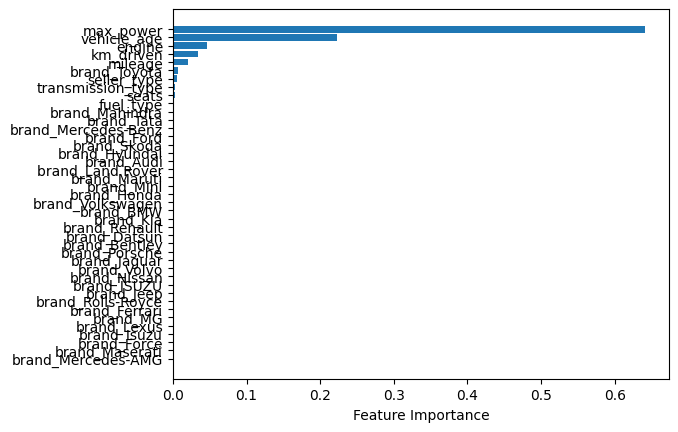

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

# Assuming feature_names is defined somewhere earlier in your code
feature_names = X_train.columns  # Or whatever your feature names are

# Create and train the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)  # Or any other desired parameters
rf_model.fit(X_train, y_train)

# Now you can access feature_importances_
feature_importance = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Train Initial Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Extract Feature Importances
feature_importance = rf_model.feature_importances_

# Step 3: Select Important Features (e.g., Keep Features with Importance > 0.02)
importance_threshold = 0.02  # You can adjust this threshold
important_feature_indices = np.where(feature_importance > importance_threshold)[0]
important_features = X_train.columns[important_feature_indices]

# Step 4: Train a New Model Using Only Important Features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]  # Ensure to transform test set accordingly

rf_model_selected = RandomForestRegressor(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

# Step 5: Evaluate Performance
y_pred = rf_model_selected.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Important Features: {mse}")

# Display Selected Important Features
important_features_df = pd.DataFrame({
    'Feature': important_features,
    'Importance': feature_importance[important_feature_indices]
}).sort_values(by='Importance', ascending=False)

print("Selected Important Features:")
print(important_features_df)


Mean Squared Error with Important Features: 0.08661268278101979
Selected Important Features:
       Feature  Importance
3    max_power    0.641606
0  vehicle_age    0.222767
2       engine    0.046762
1    km_driven    0.033685


# base model with selected features

In [ ]:
from sklearn.metrics import r2_score

# Predict on the test set
y_pred_selected = rf_model_selected.predict(X_test_selected)

# Calculate R-squared (R²) score
r2_selected = r2_score(y_test, y_pred_selected)

print(f"R-squared Score with Important Features: {r2_selected:.4f}")


R-squared Score with Important Features: 0.9182


# hyper tunning with important features

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples per leaf
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimizing for R² score
    n_jobs=-1,  # Use all available CPU cores
    verbose=2  # Show progress
)

# Fit GridSearchCV on the selected important features
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the best model using the optimal parameters
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train_selected, y_train)

# Evaluate the optimized model
y_pred_optimized = best_rf_model.predict(X_test_selected)
optimized_r2 = r2_score(y_test, y_pred_optimized)

print(f"Optimized R² Score: {optimized_r2:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Optimized R² Score: 0.9250


# Randon Forest with all features

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Base Random Forest Model (No Hyperparameter Tuning)
print("Training Base Random Forest...")

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)  # Default parameters
rf_base.fit(X_train, y_train)  # Train the model

# Make predictions
rf_base_pred = rf_base.predict(X_test)

# Evaluate the base model
rf_base_r2 = r2_score(y_test, rf_base_pred)
rf_base_rmse = np.sqrt(mean_squared_error(y_test, rf_base_pred))

# Print results
print("Base Random Forest Model Results:")
print("R2 Score:", rf_base_r2)
print("RMSE:", rf_base_rmse)

Training Base Random Forest...
Base Random Forest Model Results:
R2 Score: 0.9333388052426357
RMSE: 0.18250176345063823


# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

print("Training Random Forest with Hyperparameter Tuning...")

# Define hyperparameter grid
rf_params = {
    'n_estimators': [100, 200],        # Number of trees
    'max_depth': [10, 20],             # Maximum tree depth
    'min_samples_split': [2, 5]        # Minimum samples required to split
}

# Create Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='r2', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Get best parameters
best_params = rf_grid.best_params_

print("Best Hyperparameters:", best_params)


Training Random Forest with Hyperparameter Tuning...
Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Train the final optimized model
rf_best = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42,
    n_jobs=-1
)
rf_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=5, n_estimators=200,
                      n_jobs=-1, random_state=42)

In [ ]:
# Make predictions with the tuned model
rf_best_pred = rf_best.predict(X_test)


In [ ]:
# Evaluate the tuned model
rf_best_r2 = r2_score(y_test, rf_best_pred)
rf_best_rmse = np.sqrt(mean_squared_error(y_test, rf_base_pred))

# Print final results
print("Optimized Random Forest Model Results:")
print("R2 Score:", rf_best_r2)
print("RMSE:", rf_best_rmse)

Optimized Random Forest Model Results:
R2 Score: 0.9352288626783511
RMSE: 0.18250176345063823


# Cross validation

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define K-Fold CV
folds = KFold(n_splits=5, shuffle=True, random_state=100)

# Use the best hyperparameters you found
best_params = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5}

# Create the optimized Random Forest model
rf_best = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42,
    n_jobs=-1
)

# Perform K-Fold Cross-Validation (R² Scores)
R2s_kcv = cross_val_score(rf_best, X_train, y_train, cv=folds, scoring='r2')

# Print Cross-Validation Results
print("K-Fold Cross-Validation R2 Scores:", R2s_kcv)
print("Average R Square after K-Fold CV: ", np.mean(R2s_kcv))


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

# Use the best hyperparameters you found
best_params = {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5}

print("Performing K-Fold Cross-Validation on Optimized Random Forest...")

# Create the optimized model
rf_best = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42,
    n_jobs=-1
)

# Define K-Fold Cross-Validation (5-Folds)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_r2_scores = []
cv_rmse_scores = []

# Perform K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the fold
    rf_best.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_val_pred = rf_best.predict(X_val_fold)

    # Calculate R² and RMSE for this fold
    fold_r2 = r2_score(y_val_fold, y_val_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))

    # Store scores
    cv_r2_scores.append(fold_r2)
    cv_rmse_scores.append(fold_rmse)

# Compute mean R² and RMSE across all folds
mean_cv_r2 = np.mean(cv_r2_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)

# Train final model on full training set
rf_best.fit(X_train, y_train)

# Make predictions on test set
rf_best_pred = rf_best.predict(X_test)

# Evaluate on test set
rf_best_r2 = r2_score(y_test, rf_best_pred)
rf_best_rmse = np.sqrt(mean_squared_error(y_test, rf_best_pred))

# Print Cross-Validation and Final Results
print("K-Fold Cross-Validation Results for Optimized Random Forest:")
print(f"R2 Scores per Fold: {cv_r2_scores}")
print(f"Mean CV R2 Score: {mean_cv_r2:.4f}")
print(f"Mean CV RMSE: {mean_cv_rmse:.4f}")

print("\nFinal Test Set Results:")
print(f"Test Set R2 Score: {rf_best_r2:.4f}")
print(f"Test Set RMSE: {rf_best_rmse:.4f}")


Performing K-Fold Cross-Validation on Optimized Random Forest...
K-Fold Cross-Validation Results for Optimized Random Forest:
R2 Scores per Fold: [0.9357129653484769, 0.9310006344992614, 0.9342996605454876, 0.9364721140319185, 0.9355479926785781]
Mean CV R2 Score: 0.9346
Mean CV RMSE: 0.1743

Final Test Set Results:
Test Set R2 Score: 0.9352
Test Set RMSE: 0.1799


# The XGBoost model training

base model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, xgb_pred)
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))

print("XGBoost Results:")
print("R2 Score:", r2)
print("RMSE:", rmse)

XGBoost Results:
R2 Score: 0.9469469186070151
RMSE: 0.1628117803489783


# optuna works well with XGBoost

In [ ]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 0.3),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "random_state": 42
    }

    model = xgb.XGBRegressor(**params, enable_categorical=False)
    model.fit(X_train, y_train)

    preds = model.predict(X_test)

    # Calculate RMSE without the 'squared' argument
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)  # Calculate RMSE manually

    return rmse

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

# Get best parameters
print("Best Hyperparameters:", study.best_params)

[I 2025-02-08 13:34:06,835] A new study created in memory with name: no-name-a0f430a6-2335-4400-9f1b-e84da199efde
[I 2025-02-08 13:34:12,628] Trial 0 finished with value: 0.24792368579021004 and parameters: {'n_estimators': 207, 'max_depth': 9, 'learning_rate': 0.020792613471461944, 'subsample': 0.7543107415727663, 'colsample_bytree': 0.7113839346360384, 'gamma': 0.08429078543533265, 'min_child_weight': 6}. Best is trial 0 with value: 0.24792368579021004.
[I 2025-02-08 13:34:30,787] Trial 1 finished with value: 0.17102291932255367 and parameters: {'n_estimators': 484, 'max_depth': 9, 'learning_rate': 0.06920357399259744, 'subsample': 0.6471552217166546, 'colsample_bytree': 0.7541009223527748, 'gamma': 0.16067454237429643, 'min_child_weight': 6}. Best is trial 1 with value: 0.17102291932255367.
[I 2025-02-08 13:34:35,720] Trial 2 finished with value: 0.18036009453623053 and parameters: {'n_estimators': 250, 'max_depth': 6, 'learning_rate': 0.0326262435027485, 'subsample': 0.747665872682

Best Hyperparameters: {'n_estimators': 436, 'max_depth': 8, 'learning_rate': 0.041717796011240336, 'subsample': 0.8175526041307304, 'colsample_bytree': 0.7189379977627715, 'gamma': 0.10106490405337266, 'min_child_weight': 4}


# rebuilding the model with the best parameters

In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Use the best parameters from tuning
best_params = {
    'n_estimators': 436,
    'max_depth': 8,
    'learning_rate': 0.041717796011240336,
    'subsample': 0.8175526041307304,
    'colsample_bytree': 0.7189379977627715,
    'gamma': 0.10106490405337266,
    'min_child_weight': 4,
    'random_state': 42
}

# Train the optimized XGBoost model
xgb_best = xgb.XGBRegressor(**best_params)
xgb_best.fit(X_train, y_train)

# Make predictions
xgb_pred_best = xgb_best.predict(X_test)

# Evaluate the optimized model
r2_best = r2_score(y_test, xgb_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, xgb_pred_best))

# Print results
print("Optimized XGBoost Model Results:")
print(f"R2 Score: {r2_best:.4f}")
print(f"RMSE: {rmse_best:.4f}")


Optimized XGBoost Model Results:
R2 Score: 0.9428
RMSE: 0.1690


# cross validation

5-Folds

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store results
cv_r2_scores = []
cv_rmse_scores = []

# Perform K-Fold Cross-Validation Manually
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the fold
    xgb_best = xgb.XGBRegressor(**best_params)
    xgb_best.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_val_pred = xgb_best.predict(X_val_fold)

    # Calculate R² and RMSE for this fold
    fold_r2 = r2_score(y_val_fold, y_val_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))

    # Store scores
    cv_r2_scores.append(fold_r2)
    cv_rmse_scores.append(fold_rmse)

# Compute mean R² and RMSE across all folds
mean_cv_r2 = np.mean(cv_r2_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)

# Print Cross-Validation Results
print("Manual K-Fold Cross-Validation for XGBoost:")
print(f"R2 Scores per Fold: {cv_r2_scores}")
print(f"Mean CV R2 Score: {mean_cv_r2:.4f}")
print(f"Mean CV RMSE: {mean_cv_rmse:.4f}")


Manual K-Fold Cross-Validation for XGBoost:
R2 Scores per Fold: [0.940367556033435, 0.9402134593199459, 0.9406206598799973, 0.9410610168143171, 0.9410039716081127]
Mean CV R2 Score: 0.9407
Mean CV RMSE: 0.1660


checking for overfitting since the accuracy went from:0.9428   to:0.9407, which might suggest overfitting

In [ ]:
# Get Training Set Performance
y_train_pred = xgb_best.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Get Test Set Performance
y_test_pred = xgb_best.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Print Results
print("Training Performance:")
print(f"R2 Score: {r2_train:.4f}, RMSE: {rmse_train:.4f}")

print("\nTest Performance:")
print(f"R2 Score: {r2_test:.4f}, RMSE: {rmse_test:.4f}")

# Check the difference
performance_gap = r2_train - r2_test
print(f"\nPerformance Gap (Train - Test R2): {performance_gap:.4f}")


Training Performance:
R2 Score: 0.9551, RMSE: 0.1444

Test Performance:
R2 Score: 0.9417, RMSE: 0.1706

Performance Gap (Train - Test R2): 0.0134


✔ the model is performing well and generalizing properly.
✔ No major overfitting detected (gap = 0.0134).

trying 10 fold

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error

# Define K-Fold Cross-Validation (10-Folds)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Use the best parameters from tuning
best_params = {
    'n_estimators': 436,
    'max_depth': 8,
    'learning_rate': 0.041717796011240336,
    'subsample': 0.8175526041307304,
    'colsample_bytree': 0.7189379977627715,
    'gamma': 0.10106490405337266,
    'min_child_weight': 4,
    'random_state': 42
}

# Store results
cv_r2_scores = []
cv_rmse_scores = []

# Perform 10-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the model on the fold
    xgb_best = xgb.XGBRegressor(**best_params)
    xgb_best.fit(X_train_fold, y_train_fold)

    # Make predictions
    y_val_pred = xgb_best.predict(X_val_fold)

    # Calculate R² and RMSE for this fold
    fold_r2 = r2_score(y_val_fold, y_val_pred)
    fold_rmse = np.sqrt(mean_squared_error(y_val_fold, y_val_pred))

    # Store scores
    cv_r2_scores.append(fold_r2)
    cv_rmse_scores.append(fold_rmse)

# Compute mean R² and RMSE across all 10 folds
mean_cv_r2 = np.mean(cv_r2_scores)
mean_cv_rmse = np.mean(cv_rmse_scores)

# Print Cross-Validation Results
print("10-Fold Cross-Validation Results for Optimized XGBoost:")
print(f"R2 Scores per Fold: {cv_r2_scores}")
print(f"Mean CV R2 Score: {mean_cv_r2:.4f}")
print(f"Mean CV RMSE: {mean_cv_rmse:.4f}")


10-Fold Cross-Validation Results for Optimized XGBoost:
R2 Scores per Fold: [0.9435209361063701, 0.9369697659881411, 0.9437888112712961, 0.9356018502851751, 0.9419819884394034, 0.940038723639349, 0.9463074256570903, 0.9361800868402311, 0.9429593296440328, 0.9392431906749776]
Mean CV R2 Score: 0.9407
Mean CV RMSE: 0.1659


# *SVR*

# base model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define the basic SVM model
svm_model = SVR()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Evaluate the model
r2_svm = r2_score(y_test, svm_pred)
rmse_svm = np.sqrt(mean_squared_error(y_test, svm_pred))

# Print results
print("Basic SVR Model Results:")
print(f"R2 Score: {r2_svm:.4f}")
print(f"RMSE: {rmse_svm:.4f}")


Basic SVR Model Results:
R2 Score: 0.9324
RMSE: 0.2676


# Hyperparameter Tuning

In [ ]:
import math
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Simplified parameter grid
param_grid = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.5, 1],
    'gamma': [0.01, 0.1, 1]
}




In [ ]:

# RandomizedSearchCV
random_search_svr_rbf = RandomizedSearchCV(estimator=SVR(kernel='rbf'),
                                           param_distributions=param_grid,
                                           n_iter=20,  # Number of random combinations
                                           cv=3,       # 3-fold CV
                                           scoring='neg_mean_squared_error',
                                           verbose=1,
                                           n_jobs=-1,
                                           random_state=42)


In [ ]:
# Fit the RandomizedSearchCV
random_search_svr_rbf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [1, 10, 100],
                                        'epsilon': [0.1, 0.5, 1],
                                        'gamma': [0.01, 0.1, 1]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
# Get the best parameters and model
best_params = random_search_svr_rbf.best_params_
print("Best Parameters for RBF Kernel:", best_params)

Best Parameters for RBF Kernel: {'gamma': 0.01, 'epsilon': 0.1, 'C': 100}


In [ ]:
# Predict on the test set
y_pred_rbf = random_search_svr_rbf.best_estimator_.predict(X_test)

In [ ]:
svr_rbf = random_search_svr_rbf.best_estimator_

y_pred_train = svr_rbf.predict(X_train)
y_pred_test = svr_rbf.predict(X_test)

In [ ]:
# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_rbf)
mae = mean_absolute_error(y_test, y_pred_rbf)
r2 = r2_score(y_test, y_pred_rbf)

In [ ]:
# Concatenate training and test sets
X_total = np.concatenate((X_train, X_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

# Make predictions on the entire dataset
y_pred_total = svr_rbf.predict(X_total)

# Compute performance metrics
r2_total = r2_score(y_total, y_pred_total)  # Total R² Score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_total = mean_squared_error(y_total, y_pred_total)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_total = mean_absolute_error(y_total, y_pred_total)

# Print Performance Metrics
print("\nPerformance Metrics:")
print(f"R² Score on Training Set: {r2_train:.4f}")
print(f"R² Score on Test Set: {r2_test:.4f}")
print(f"R² Score on Total Dataset: {r2_total:.4f}")  # Added Total R²

print(f"Mean Squared Error (MSE) on Training Set: {mse_train:.4f}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test:.4f}")
print(f"Mean Squared Error (MSE) on Total Dataset: {mse_total:.4f}")  # Added Total MSE

print(f"Mean Absolute Error (MAE) on Training Set: {mae_train:.4f}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test:.4f}")
print(f"Mean Absolute Error (MAE) on Total Dataset: {mae_total:.4f}")  # Added Total MAE

# Check for Overfitting
if abs(r2_train - r2_test) > 0.1:
    print("\n⚠️ Warning: Potential Overfitting Detected.")
else:
    print("\n✅ The model generalizes well.")


Performance Metrics:
R² Score on Training Set: 0.9371
R² Score on Test Set: 0.9328
R² Score on Total Dataset: 0.9362
Mean Squared Error (MSE) on Training Set: 0.0620
Mean Squared Error (MSE) on Test Set: 0.0712
Mean Squared Error (MSE) on Total Dataset: 0.0638
Mean Absolute Error (MAE) on Training Set: 0.1889
Mean Absolute Error (MAE) on Test Set: 0.2007
Mean Absolute Error (MAE) on Total Dataset: 0.1912

✅ The model generalizes well.


# cross validation

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVR
import numpy as np

# Best Parameters from Tuning
best_params = {
    'gamma': 0.01,
    'epsilon': 0.1,
    'C': 100,
    'kernel': 'rbf'
}

# Define Optimized SVR Model
svr_best = SVR(**best_params)

# Define 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform Cross-Validation and Calculate R² Scores
R2s_kcv = cross_val_score(svr_best, X_train, y_train, cv=kf, scoring='r2')

# Print Cross-Validation Results
print("10-Fold Cross-Validation Results for Optimized SVR:")
print(f"R2 Scores per Fold: {R2s_kcv}")
print(f"Mean CV R2 Score: {np.mean(R2s_kcv):.4f}")
print(f"Standard Deviation of R2 Scores: {np.std(R2s_kcv):.4f}")



10-Fold Cross-Validation Results for Optimized SVR:
R2 Scores per Fold: [0.93209339 0.92900614 0.93344494 0.93340599 0.93288254 0.93170256
 0.93806875 0.92269608 0.92811443 0.92374442]
Mean CV R2 Score: 0.9305
Standard Deviation of R2 Scores: 0.0045


# K-NN

# Base model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the KNN regression model
k = 5  # Number of neighbors
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Absolute Error: 0.22
Mean Squared Error: 0.09
R-squared Score: 0.92


# Hyper Tuning

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define hyperparameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Initialize KNN regressor
knn = KNeighborsRegressor()

# Perform Grid Search with Cross Validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model selection
best_k = grid_search.best_params_['n_neighbors']
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Make predictions
y_pred = best_knn.predict(X_test)

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best k: {best_k}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Best k: 7
Mean Absolute Error: 0.22
Mean Squared Error: 0.09
R-squared Score: 0.92


# Cross Validation 5-Fold

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize KNN regressor with the best k from GridSearchCV
best_knn = KNeighborsRegressor(n_neighbors=best_k)

# Perform 5-Fold Cross Validation
cv_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='r2')

# Print Cross-validation Results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of R² scores: {np.std(cv_scores):.2f}")


Cross-validation R² scores: [0.90989123 0.91338306 0.90687332 0.91862777 0.91159594]
Mean R² score: 0.91
Standard Deviation of R² scores: 0.00


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

mae_scores = cross_val_score(best_knn, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validation MAE: {-mae_scores}")
print(f"Mean MAE: {-np.mean(mae_scores):.2f}")
print(f"Standard Deviation of MAE: {np.std(mae_scores):.2f}")


Cross-validation MAE: [0.22154272 0.22011106 0.2198911  0.21278176 0.21711561]
Mean MAE: 0.22
Standard Deviation of MAE: 0.00


# Cross Validation 10-Fold

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform 10-Fold Cross Validation for R-squared
cv_r2_scores = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='r2')

print(f"10-Fold Cross-validation R² scores: {cv_r2_scores}")
print(f"Mean R² score: {np.mean(cv_r2_scores):.2f}")
print(f"Standard Deviation of R² scores: {np.std(cv_r2_scores):.2f}")

# Perform 10-Fold Cross Validation for MAE
cv_mae_scores = cross_val_score(best_knn, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')

print(f"\n10-Fold Cross-validation MAE: {-cv_mae_scores}")
print(f"Mean MAE: {-np.mean(cv_mae_scores):.2f}")
print(f"Standard Deviation of MAE: {np.std(cv_mae_scores):.2f}")


10-Fold Cross-validation R² scores: [0.91939454 0.90160408 0.91852283 0.90969922 0.91441081 0.90391034
 0.92232519 0.91745871 0.91061036 0.91613687]
Mean R² score: 0.91
Standard Deviation of R² scores: 0.01

10-Fold Cross-validation MAE: [0.21613018 0.22541336 0.21340518 0.22552916 0.21369091 0.21938911
 0.20535268 0.21517232 0.2236666  0.20950143]
Mean MAE: 0.22
Standard Deviation of MAE: 0.01


# 10-fold CV provides a more robust evaluation than 5-fold CV, and results confirm that the model is not overfitting.
